In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## LOAD THE DATASET

In [5]:
fake = pd.read_csv("fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true = pd.read_csv("true.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## EXPLORATORY DATA ANANLYSIS

In [8]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [15]:
true.info

<bound method DataFrame.info of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuter

In [17]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [19]:
true.shape

(21417, 4)

In [21]:
fake.shape

(23481, 4)

## DATA PREPROCESSING

In [24]:
fake["label"] = 0
true["label"] = 1

In [26]:
#MERGUNG DATASETS
df = pd.concat([fake, true], axis=0)
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [28]:
df.shape

(44898, 5)

In [30]:
df2 = df.sample(frac=1).reset_index(drop = True)
df2

,title,text,subject,date,label
0,EU leaders seek greater reductions in Africa i...,BRUSSELS (Reuters) - European Union leaders ag...,worldnews,"October 19, 2017",1
1,TOMI LAHREN: “I Guess Jill Stein Wants To See ...,"The shrill, old socialist Carla Marx wannabe...",left-news,"Dec 1, 2016",0
2,Hannity Gets His A** Kicked By Newsweek For L...,Sean Hannity is definitely going to blow a gas...,News,"August 15, 2016",0
3,‘Bernie Sanders is on a Mission’,21st Century Wire says But he can he accomplis...,Middle-east,"May 26, 2016",0
4,Trump Muslim comments do not tarnish view of U...,WASHINGTON (Reuters) - Donald Trump’s call for...,politicsNews,"August 10, 2016",1
...,...,...,...,...,...
44893,Bill O’Reilly: I’ll Flee The Country If Sande...,Fox News blowhard Bill O Reilly really doesn t...,News,"January 15, 2016",0
44894,Former CIA Operative: The U.S. May Have To Vo...,Former CIA Operative Robert Baer weighed in on...,News,"December 10, 2016",0
44895,Exxon Mobil Brazenly Attempts To Use Administ...,"During Watergate, the line became follow the ...",News,"April 20, 2017",0
44896,Trump summit with Mexico's Pena Nieto still on...,"MEXICO CITY, (Reuters) - A summit between U.S....",politicsNews,"January 26, 2017",1


In [32]:
 df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [34]:
## DATA SET IS NEARLY BALANCED

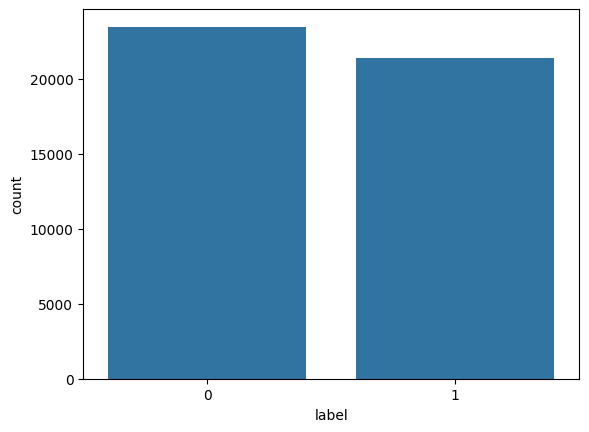

In [36]:
sns.countplot(x=df2['label'],data=df2)
df2.label.value_counts()
plt.show()

In [38]:
import re

In [40]:
df2['combined'] = df2['title'] + df2['text']

In [42]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text= re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

In [44]:
df3 = df2['combined']= df2['text'].apply(clean_text)

In [45]:
df2['combined']

0        brussels reuters european union leaders agreed...
1        the shrill old socialist carla marx wannabe wh...
2        sean hannity is definitely going to blow a gas...
3        st century wire says but he can he accomplish ...
4        washington reuters donald trumps call for a te...
                               ...                        
44893    fox news blowhard bill o reilly really doesn t...
44894    former cia operative robert baer weighed in on...
44895    during watergate the line became follow the mo...
44896    mexico city reuters a summit between us presid...
44897    they re calling them y all qaeda it s all at o...
Name: combined, Length: 44898, dtype: object

In [46]:
#df2_cat_ft= df2.select_dtypes(include =[ "object", "category"])
#df2_cat_ft

In [47]:
#df2_num_ft= df2.select_dtypes(include =[ "int64", "float"])
#df2_num_ft

In [48]:
#from sklearn.preprocessing import LabelEncoder

In [49]:
#df2_cat_ft.columns

In [50]:
#label_encoder = LabelEncoder()

In [51]:
#df2_cat_copy = df2_cat_ft.copy()

In [60]:
#for i in df2_cat_ft.columns:
    #df2_cat_ft[i] = label_encoder.fit_transform(df2_cat_copy[i])

In [62]:
#df2_cat_ft.head()

In [64]:
#df2_cat_ft['text'].value_counts()

In [66]:
#df = pd.concat([df2_num_ft, df2_cat_ft], axis=1)
#df.head()

## FEATURE SCALING

In [69]:
x= df2['combined']
y= df2['label']

In [71]:
x

0        brussels reuters european union leaders agreed...
1        the shrill old socialist carla marx wannabe wh...
2        sean hannity is definitely going to blow a gas...
3        st century wire says but he can he accomplish ...
4        washington reuters donald trumps call for a te...
                               ...                        
44893    fox news blowhard bill o reilly really doesn t...
44894    former cia operative robert baer weighed in on...
44895    during watergate the line became follow the mo...
44896    mexico city reuters a summit between us presid...
44897    they re calling them y all qaeda it s all at o...
Name: combined, Length: 44898, dtype: object

In [73]:
y

0        1
1        0
2        0
3        0
4        1
        ..
44893    0
44894    0
44895    0
44896    1
44897    0
Name: label, Length: 44898, dtype: int64

## TRAIN TEST SPLIT

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42) 

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

## LOGISTIC REGRESSION

In [93]:
#impoty the moeal logistic regression  (classsifictaion)
# that contains discrete values
from sklearn.linear_model import LogisticRegression

In [94]:
model= LogisticRegression()

In [95]:
model.fit(x_train_tfidf, y_train)

LogisticRegression()

In [96]:
y_pred = model.predict(x_train_tfidf)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [104]:
# testing model
def report(model):
   y_pred = model.predict(x_test_tfidf)
   print(f"classification report {classification_report(y_test,y_pred)}")
   #print(f"accuracy:{accuracy_score(y_test,y_pred)}")
   print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")
   conf_mat = confusion_matrix(y_test, y_pred)
   disp = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
   disp.plot()
   plt.grid(False)
   disp.ax_.set_title("Confusion Matrix")
   plt.grid(False)
   plt.show()

classification report               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7034
           1       0.98      0.99      0.99      6436

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

Accuracy Score: 98.65%


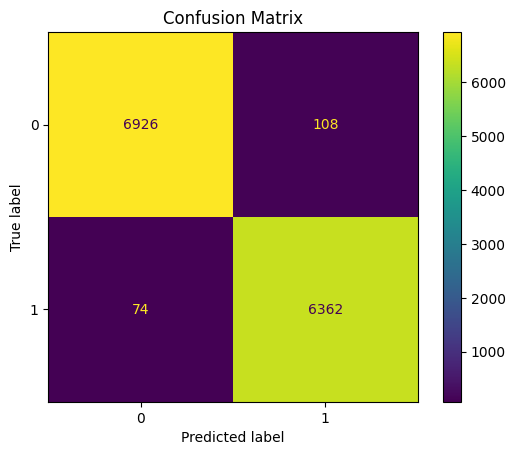

In [106]:
report(model)

In [108]:
def report(model):
   y_pred = model.predict(x_train_tfidf)
   print(f"classification report {classification_report(y_train,y_pred)}")
   #print(f"accuracy:{accuracy_score(y_test,y_pred)}")
   print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
   conf_mat = confusion_matrix(y_train, y_pred)
   disp = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
   disp.plot()
   plt.grid(False)
   disp.ax_.set_title("Confusion Matrix")
   plt.grid(False)
   plt.show()

classification report               precision    recall  f1-score   support

           0       0.99      0.99      0.99     16447
           1       0.99      0.99      0.99     14981

    accuracy                           0.99     31428
   macro avg       0.99      0.99      0.99     31428
weighted avg       0.99      0.99      0.99     31428

Accuracy Score: 99.24%


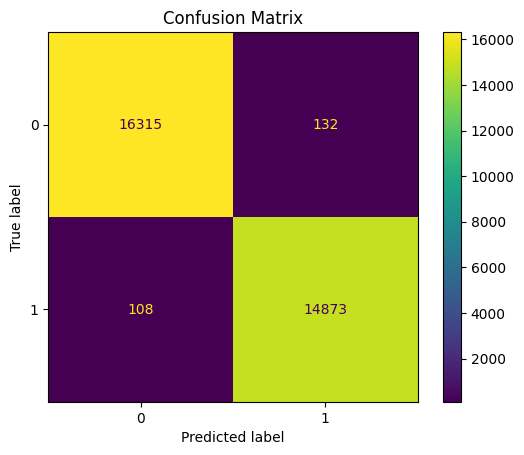

In [110]:
report(model)

## MODEL # 2 DECISION TREE

In [113]:
from sklearn.tree import DecisionTreeClassifier 

In [115]:
model= DecisionTreeClassifier()

In [117]:
model.fit(x_train_tfidf, y_train)

DecisionTreeClassifier()

In [118]:
y_pred = model.predict(x_test_tfidf)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [119]:
# testing model
def report(model):
   y_pred = model.predict(x_test_tfidf)
   print(f"classification report {classification_report(y_test,y_pred)}")
   #print(f"accuracy:{accuracy_score(y_test,y_pred)}")
   print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")
   conf_mat = confusion_matrix(y_test, y_pred)
   disp = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
   disp.plot()
   plt.grid(False)
   disp.ax_.set_title("Confusion Matrix")
   plt.grid(False)
   plt.show()

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7034
           1       0.99      1.00      1.00      6436

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

Accuracy Score: 99.55%


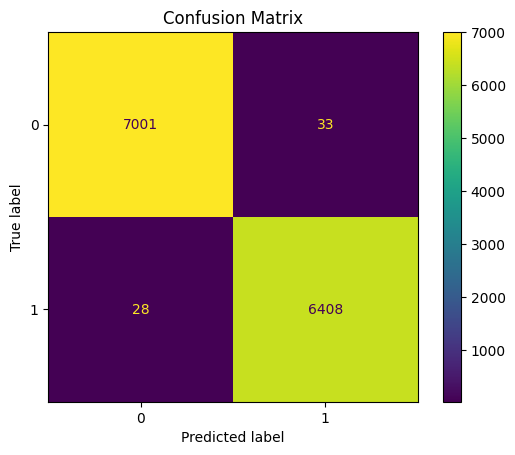

In [120]:
report(model)

In [121]:
def report(model):
   y_pred = model.predict(x_train_tfidf)
   print(f"classification report {classification_report(y_train,y_pred)}")
   #print(f"accuracy:{accuracy_score(y_test,y_pred)}")
   print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
   conf_mat = confusion_matrix(y_train, y_pred)
   disp = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
   disp.plot()
   plt.grid(False)
   disp.ax_.set_title("Confusion Matrix")
   plt.grid(False)
   plt.show()

report(model)

## MODEL NO 3 RANDOM FOREST

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
model = RandomForestClassifier()

In [126]:
model.fit(x_train_tfidf, y_train)

RandomForestClassifier()

In [127]:
y_pred = model.predict(x_test_tfidf)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [137]:
# testing model
def report(model):
   y_pred = model.predict(x_test_tfidf)
   print(f"classification report {classification_report(y_test,y_pred)}")
   #print(f"accuracy:{accuracy_score(y_test,y_pred)}")
   print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")
   conf_mat = confusion_matrix(y_test, y_pred)
   disp = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
   disp.plot()
   plt.grid(False)
   disp.ax_.set_title("Confusion Matrix")
   plt.grid(False)
   plt.show()

classification report               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7034
           1       0.98      0.99      0.99      6436

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

Accuracy Score: 98.76%


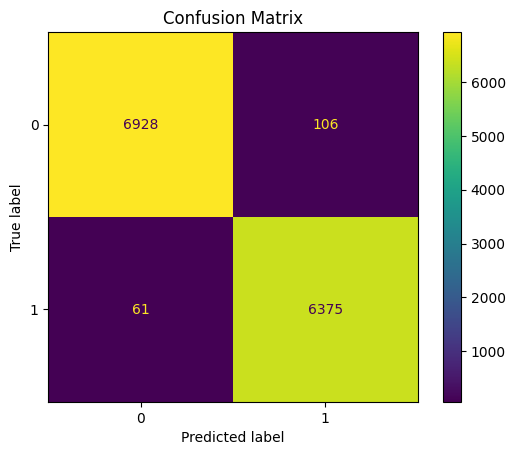

In [139]:
report(model)

In [140]:
def report(model):
   y_pred = model.predict(x_train_tfidf)
   print(f"classification report {classification_report(y_train,y_pred)}")
   #print(f"accuracy:{accuracy_score(y_test,y_pred)}")
   print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
   conf_mat = confusion_matrix(y_train, y_pred)
   disp = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
   disp.plot()
   plt.grid(False)
   disp.ax_.set_title("Confusion Matrix")
   plt.grid(False)
   plt.show()

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16447
           1       1.00      1.00      1.00     14981

    accuracy                           1.00     31428
   macro avg       1.00      1.00      1.00     31428
weighted avg       1.00      1.00      1.00     31428

Accuracy Score: 100.00%


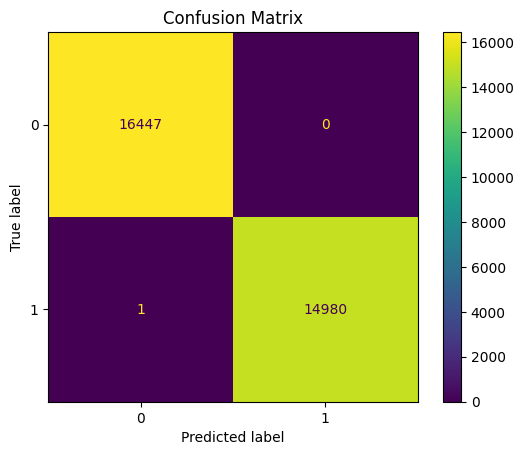

In [141]:
report(model)

## passive aggressive classifier

In [143]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [146]:
model = PassiveAggressiveClassifier(max_iter=50)

In [147]:
model.fit(x_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [148]:
y_pred = model.predict(x_test_tfidf)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [149]:
# testing model
def report(model):
   y_pred = model.predict(x_test_tfidf)
   print(f"classification report {classification_report(y_test,y_pred)}")
   #print(f"accuracy:{accuracy_score(y_test,y_pred)}")
   print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")
   conf_mat = confusion_matrix(y_test, y_pred)
   disp = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
   disp.plot()
   plt.grid(False)
   disp.ax_.set_title("Confusion Matrix")
   plt.grid(False)
   plt.show()

classification report               precision    recall  f1-score   support

           0       1.00      0.99      1.00      7034
           1       0.99      1.00      0.99      6436

    accuracy                           1.00     13470
   macro avg       0.99      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

Accuracy Score: 99.50%


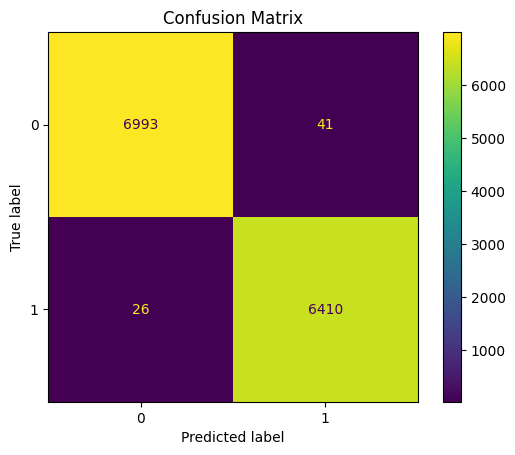

In [150]:
report(model)

In [151]:
def report(model):
   y_pred = model.predict(x_train_tfidf)
   print(f"classification report {classification_report(y_train,y_pred)}")
   #print(f"accuracy:{accuracy_score(y_test,y_pred)}")
   print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
   conf_mat = confusion_matrix(y_train, y_pred)
   disp = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
   disp.plot()
   plt.grid(False)
   disp.ax_.set_title("Confusion Matrix")
   plt.grid(False)
   plt.show()

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16447
           1       1.00      1.00      1.00     14981

    accuracy                           1.00     31428
   macro avg       1.00      1.00      1.00     31428
weighted avg       1.00      1.00      1.00     31428

Accuracy Score: 100.00%


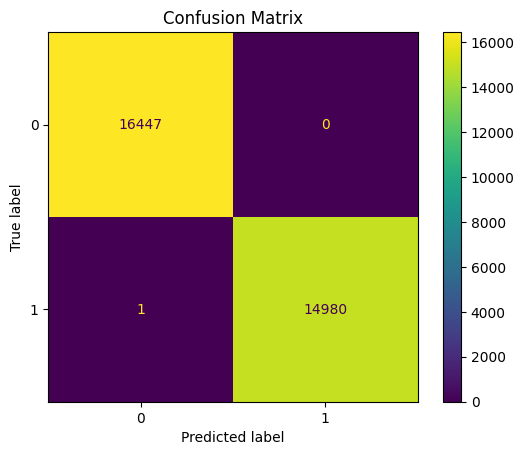

In [152]:
report(model)

## GRIDSEARCHCV

In [181]:
x= df2['combined']
y= df2['label']

In [185]:
x_train, x_other, y_train, y_other = train_test_split(x,y, test_size = 0.2, random_state=42)

In [189]:
x_val, x_test, y_val, y_test = train_test_split(x_other, y_other, test_size = 0.5, random_state=42)

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [239]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [241]:
from sklearn.model_selection import cross_validate

In [243]:
from sklearn.model_selection import KFold

In [245]:
k = 10 # either 5 or 10
kf = KFold(n_splits=k, shuffle=True, random_state = 42)

In [247]:
scoring = ["neg_mean_absolute_error", "neg_root_mean_squared_error", "r2", "max_error"]

In [253]:
## scorin fon the basis of cross validation
scores = cross_validate(model, x_train_tfidf, y_train, scoring=scoring, cv=kf)

In [255]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,test_r2,test_max_error
0,1.380470,0.004954,-0.123652,-0.163281,0.893214,-0.847403
1,1.337241,0.000000,-0.120544,-0.158142,0.899683,-0.770302
2,1.259930,0.000000,-0.125134,-0.163946,0.892371,-0.829789
3,1.262210,0.000000,-0.122472,-0.161071,0.895775,-0.937209
4,1.203382,0.000000,-0.124990,-0.163319,0.893136,-0.811563
5,1.409413,0.000000,-0.122356,-0.158321,0.899457,-1.229807
6,1.245419,0.000000,-0.122184,-0.161184,0.895951,-0.788310
7,1.437691,0.015621,-0.122698,-0.159856,0.897606,-0.838181
8,1.287522,0.000000,-0.123642,-0.161438,0.895651,-0.695330
9,1.289837,0.000000,-0.122488,-0.160165,0.896947,-0.778239


In [257]:
pd.DataFrame(scores).abs().mean()

fit_time                            1.311311
score_time                          0.002058
test_neg_mean_absolute_error        0.123016
test_neg_root_mean_squared_error    0.161072
test_r2                             0.895979
test_max_error                      0.852613
dtype: float64

In [259]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)

In [291]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [292]:
from sklearn.linear_model import ElasticNet

In [293]:
model = ElasticNet()

In [294]:
# these are my hyperparameters for elastic model
param_grid = {"alpha" : [0.1,1,5,10,50,100],
              "l1_ratio" : [0.1,0.5,0.7,0.99,1]}

In [295]:
from sklearn.model_selection import GridSearchCV

In [296]:
k = 5 # either 5 or 10
kf = KFold(n_splits=k, shuffle=True, random_state = 42)

In [297]:
grid_model = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring="neg_root_mean_squared_error",
                           cv=kf,
                           verbose=2)

In [298]:
grid_model.fit(x_train_tfidf,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   5.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   5.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   5.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   5.5s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   5.4s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   5.4s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   5.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   5.4s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   5.4s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   5.4s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   5.3s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [308]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [310]:
pd.DataFrame(grid_model.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.507565,0.072252,0.001396,0.001197,0.1,0.10,"{'alpha': 0.1, 'l1_ratio': 0.1}",-0.499276,-0.49927,-0.49923,-0.499464,-0.500171,-0.499482,0.000354,1
1,5.470112,0.031982,0.003124,0.006248,0.1,0.50,"{'alpha': 0.1, 'l1_ratio': 0.5}",-0.499276,-0.49927,-0.49923,-0.499464,-0.500171,-0.499482,0.000354,1
28,5.461017,0.059870,0.006242,0.007645,100.0,0.99,"{'alpha': 100, 'l1_ratio': 0.99}",-0.499276,-0.49927,-0.49923,-0.499464,-0.500171,-0.499482,0.000354,1
27,5.432051,0.023040,0.003517,0.006086,100.0,0.70,"{'alpha': 100, 'l1_ratio': 0.7}",-0.499276,-0.49927,-0.49923,-0.499464,-0.500171,-0.499482,0.000354,1
26,5.496869,0.045412,0.000805,0.000986,100.0,0.50,"{'alpha': 100, 'l1_ratio': 0.5}",-0.499276,-0.49927,-0.49923,-0.499464,-0.500171,-0.499482,0.000354,1
25,5.433154,0.016145,0.006249,0.007654,100.0,0.10,"{'alpha': 100, 'l1_ratio': 0.1}",-0.499276,-0.49927,-0.49923,-0.499464,-0.500171,-0.499482,0.000354,1
24,5.429678,0.022715,0.003117,0.006234,50.0,1.00,"{'alpha': 50, 'l1_ratio': 1}",-0.499276,-0.49927,-0.49923,-0.499464,-0.500171,-0.499482,0.000354,1
23,5.459984,0.074784,0.000000,0.000000,50.0,0.99,"{'alpha': 50, 'l1_ratio': 0.99}",-0.499276,-0.49927,-0.49923,-0.499464,-0.500171,-0.499482,0.000354,1
22,5.478145,0.076339,0.000000,0.000000,50.0,0.70,"{'alpha': 50, 'l1_ratio': 0.7}",-0.499276,-0.49927,-0.49923,-0.499464,-0.500171,-0.499482,0.000354,1
21,5.431350,0.016416,0.006850,0.007250,50.0,0.50,"{'alpha': 50, 'l1_ratio': 0.5}",-0.499276,-0.49927,-0.49923,-0.499464,-0.500171,-0.499482,0.000354,1


In [312]:
model = ElasticNet(alpha= 0.1, l1_ratio= 1)

In [316]:
model.fit(x_train_tfidf, y_train)

ElasticNet(alpha=0.1, l1_ratio=1)

In [320]:
y_pred = model.predict(x_test_tfidf)

In [333]:
def evaluate(y_test,y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Mean Absolute Error :{mae}") 

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(f" Root Mean Squared Error :{rmse}") 

  r_sq = r2_score(y_test, y_pred)
  print(f"R2 SQUARE :{r_sq}") 

  non_zero_indices = y_test != 0
  mape = np.mean(np.abs((y_test[non_zero_indices] - y_pred[non_zero_indices]) / y_test[non_zero_indices])) * 100
  print("MAPE (ignoring zeros):", mape, "%")


In [335]:
evaluate(y_val, y_pred_val)

Mean Absolute Error :0.12064040104369442
 Root Mean Squared Error :0.15776860628449388
R2 SQUARE :0.9002343420022295
MAPE (ignoring zeros): 13.575651576971234 %


In [339]:
import joblib

joblib.dump(model, 'model.pkl')

joblib.dump(tfidf, 'tfidf.pkl')


['tfidf.pkl']